# <center>Tugas Besar Eksplorasi AutoML</center>

<b>Topik</b>
<br>
Implementation of TPOT and AutoPyTorch in AutoML
<br>

<b>Anggota Kelompok</b>
1. Adinda Arwa Salsabil - 1301204011
2. Henzi Juandri - 1301202285
3. I Made Aditya Putra S - 1301202172
4. Syahdan Naufal Nur Ihsan - 1301204110

<b>Dataset : Breast Cancer Wisconsin (Original) Data Set / breast-w </b>
<br>
https://www.openml.org/search?type=data&status=ac%C6%9Fve&id=15&sort=runs

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# !pip install autoPyTorch

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 913.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=445caa992c6ec2b1c8c0054830e7d0c7298c7d7c8167b8c170900ba507d2c3c9
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
!gdown --id 1lLLRZmdyGr0_9HGrUnIV7O7oh8zAITgA

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lLLRZmdyGr0_9HGrUnIV7O7oh8zAITgA
To: /content/breastw.csv
100% 21.6k/21.6k [00:00<00:00, 37.7MB/s]


In [ ]:
def boxplot(df):
    sns.set(rc={'figure.figsize':(50,50), 'figure.dpi':100})
    sns.boxplot(x="variable", y="value", data=pd.melt(df[df.columns]))

    plt.show()

In [ ]:
def InterQuartile(data_frame):
  for i in data_frame.columns:
    q1 = data_frame[i].quantile(0.25)
    q3 = data_frame[i].quantile(0.75)
    inter_quartile_range = q3-q1

    terkecil = q1 - (inter_quartile_range *1.5)
    terbesar = q3 + (inter_quartile_range * 1.5)

    data_frame.loc[data_frame[i] > terbesar , i] = terbesar
    data_frame.loc[data_frame[i] < terkecil , i] = terkecil

### **Data Understanding**

In [ ]:
# Membaca dataset
data = pd.read_csv('breastw.csv', sep =',')
data

,id,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1,5,1,1,1,2,1,3,1,1,benign
1,2,5,4,4,5,7,10,3,2,1,benign
2,3,3,1,1,1,2,2,3,1,1,benign
3,4,6,8,8,1,3,4,3,7,1,benign
4,5,4,1,1,3,2,1,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
694,695,3,1,1,1,3,2,1,1,1,benign
695,696,2,1,1,1,2,1,1,1,1,benign
696,697,5,10,10,3,7,3,8,10,2,malignant
697,698,4,8,6,4,3,4,10,6,1,malignant


In [ ]:
data = data.drop(columns=['id'])
data

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,benign
1,5,4,4,5,7,10,3,2,1,benign
2,3,1,1,1,2,2,3,1,1,benign
3,6,8,8,1,3,4,3,7,1,benign
4,4,1,1,3,2,1,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,benign
695,2,1,1,1,2,1,1,1,1,benign
696,5,10,10,3,7,3,8,10,2,malignant
697,4,8,6,4,3,4,10,6,1,malignant


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Clump_Thickness        699 non-null    int64 
 1   Cell_Size_Uniformity   699 non-null    int64 
 2   Cell_Shape_Uniformity  699 non-null    int64 
 3   Marginal_Adhesion      699 non-null    int64 
 4   Single_Epi_Cell_Size   699 non-null    int64 
 5   Bare_Nuclei            699 non-null    object
 6   Bland_Chromatin        699 non-null    int64 
 7   Normal_Nucleoli        699 non-null    int64 
 8   Mitoses                699 non-null    int64 
 9   Class                  699 non-null    object
dtypes: int64(8), object(2)
memory usage: 54.7+ KB


In [ ]:
data.nunique()

Clump_Thickness          10
Cell_Size_Uniformity     10
Cell_Shape_Uniformity    10
Marginal_Adhesion        10
Single_Epi_Cell_Size     10
Bare_Nuclei              11
Bland_Chromatin          10
Normal_Nucleoli          10
Mitoses                   9
Class                     2
dtype: int64

### **Data Preparation & Preprocessing**

In [ ]:
# Transformasi Atribut Class Menjadi Biner
# malignant (kanker ganas) = 1
# benign (kanker jinak) = 0

data['Class'] = data['Class'].replace(['malignant', 'benign'],
                                        [1, 0])
data

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [ ]:
# Cek missing value (?) pada data

data.replace('?', np.nan, inplace=True)
data['Bare_Nuclei'] = pd.to_numeric(data['Bare_Nuclei'], errors='coerce')
missing_values = data.isnull().sum()

print('Missing value pada dataset:')
print()
print(missing_values)

Missing value pada dataset:

Clump_Thickness           0
Cell_Size_Uniformity      0
Cell_Shape_Uniformity     0
Marginal_Adhesion         0
Single_Epi_Cell_Size      0
Bare_Nuclei              16
Bland_Chromatin           0
Normal_Nucleoli           0
Mitoses                   0
Class                     0
dtype: int64


In [ ]:
# Mengubah nilai missing value menjadi nilai rata-rata Bare_Nuclei

mean_bare_nuclei = data['Bare_Nuclei'].mean()
data['Bare_Nuclei'].fillna(mean_bare_nuclei, inplace=True)
data['Bare_Nuclei'] = data['Bare_Nuclei'].astype('int64')

In [ ]:
# Cek Kembali Missing Value

missing_values = data.isnull().sum()

print('Missing value pada dataset:')
print()
print(missing_values)

Missing value pada dataset:

Clump_Thickness          0
Cell_Size_Uniformity     0
Cell_Shape_Uniformity    0
Marginal_Adhesion        0
Single_Epi_Cell_Size     0
Bare_Nuclei              0
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Clump_Thickness        699 non-null    int64
 1   Cell_Size_Uniformity   699 non-null    int64
 2   Cell_Shape_Uniformity  699 non-null    int64
 3   Marginal_Adhesion      699 non-null    int64
 4   Single_Epi_Cell_Size   699 non-null    int64
 5   Bare_Nuclei            699 non-null    int64
 6   Bland_Chromatin        699 non-null    int64
 7   Normal_Nucleoli        699 non-null    int64
 8   Mitoses                699 non-null    int64
 9   Class                  699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


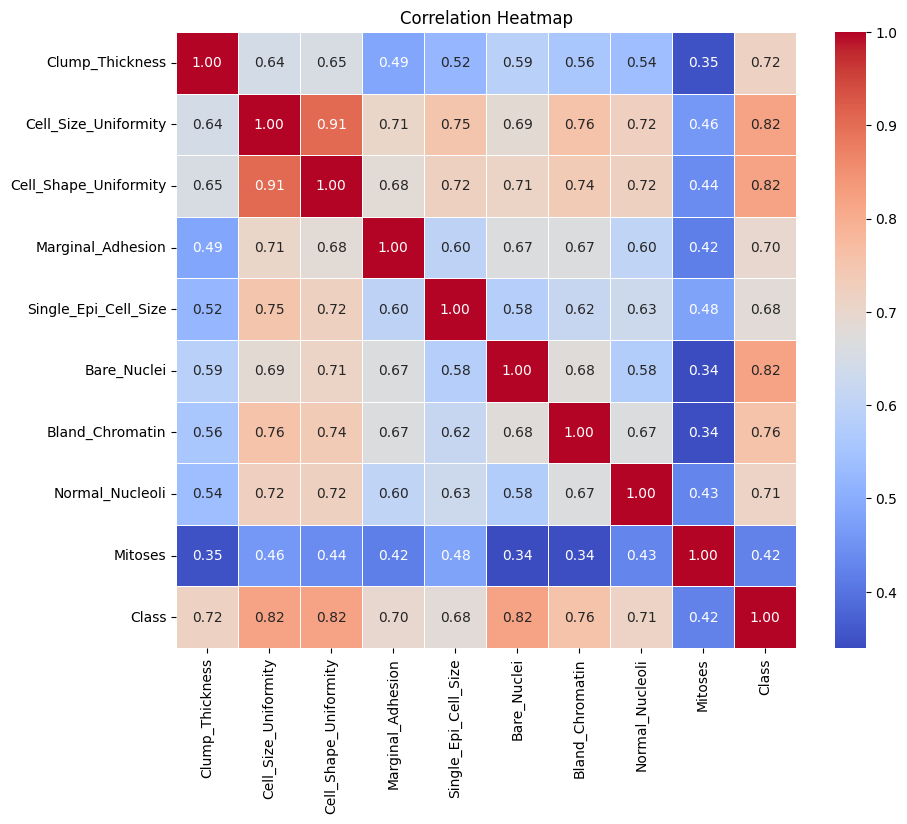

In [ ]:
# Cek Korelasi Atribut Lain terhadap Atribut Class (Target)

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Drop Kolom Mitoses

data = data.drop(columns=['Mitoses'])
data

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Class
0,5,1,1,1,2,1,3,1,0
1,5,4,4,5,7,10,3,2,0
2,3,1,1,1,2,2,3,1,0
3,6,8,8,1,3,4,3,7,0
4,4,1,1,3,2,1,3,1,0
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,0
695,2,1,1,1,2,1,1,1,0
696,5,10,10,3,7,3,8,10,1
697,4,8,6,4,3,4,10,6,1


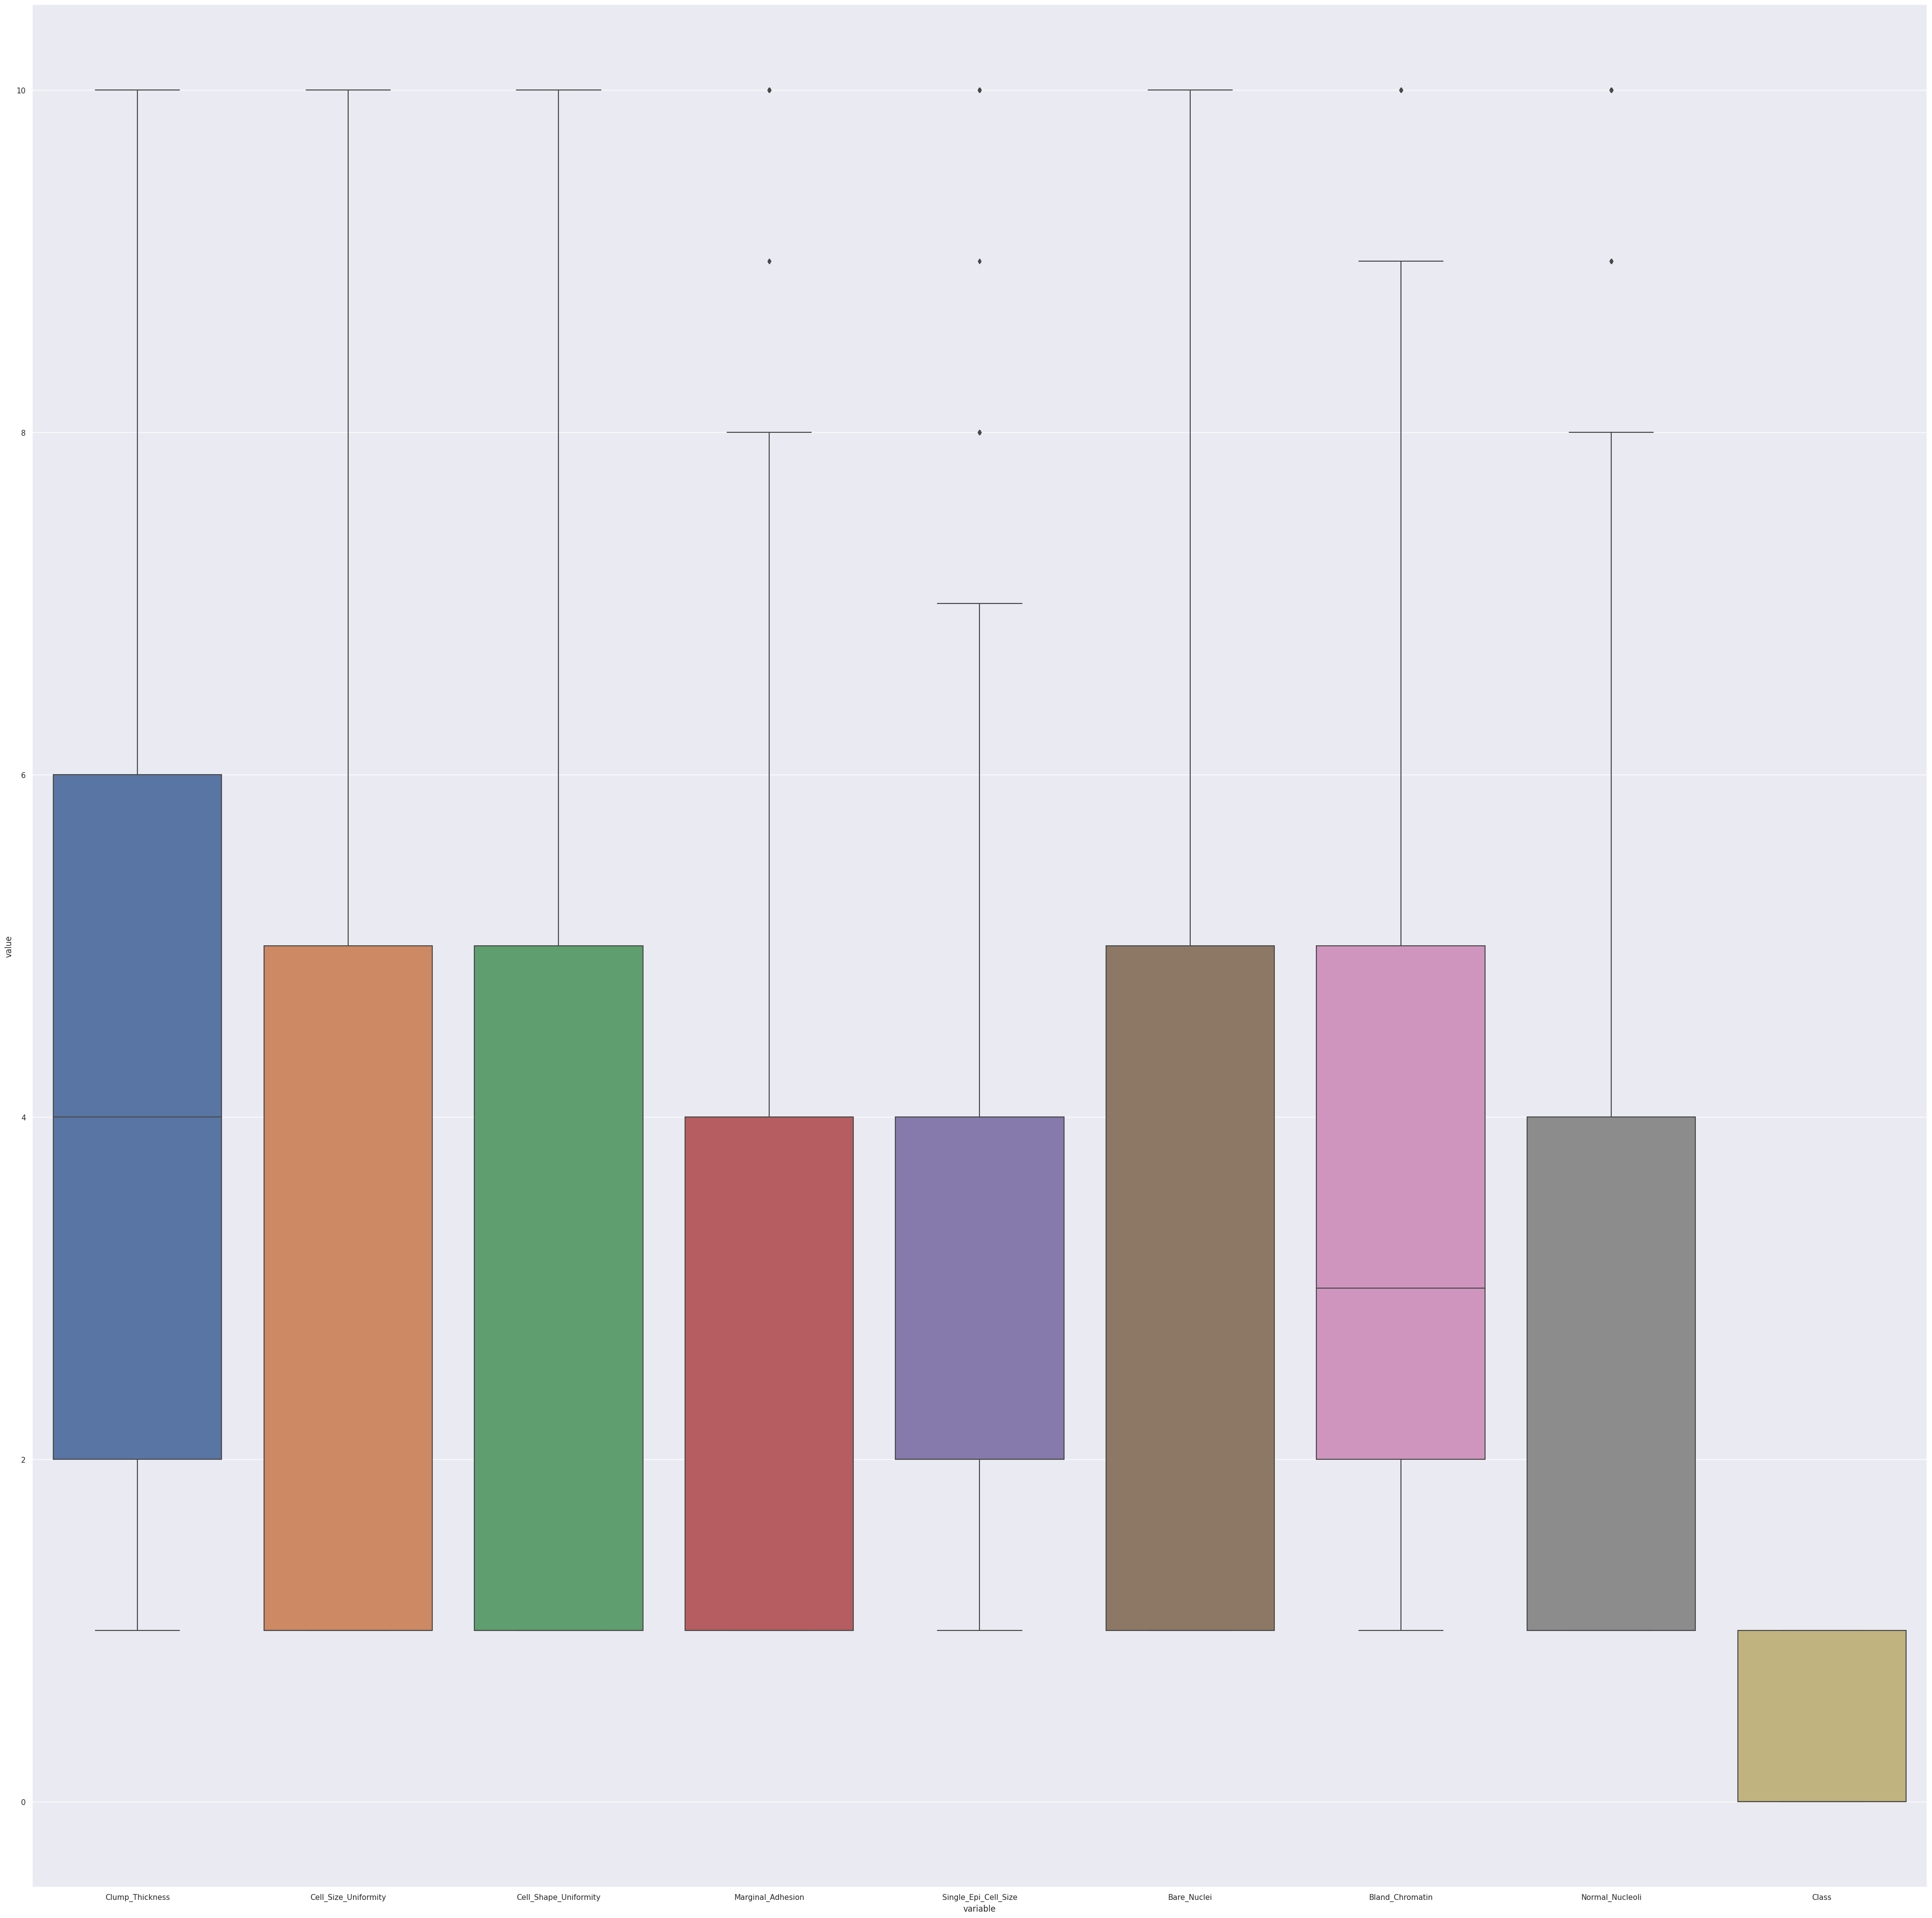

In [ ]:
# Melihat Box Plot Data
boxplot(data)

In [ ]:
scalled_data = MinMaxScaler().fit_transform(data)
new_scalled_data = pd.DataFrame(scalled_data, columns=data.columns)
print(new_scalled_data)

     Clump_Thickness  Cell_Size_Uniformity  Cell_Shape_Uniformity  \
0           0.444444              0.000000               0.000000   
1           0.444444              0.333333               0.333333   
2           0.222222              0.000000               0.000000   
3           0.555556              0.777778               0.777778   
4           0.333333              0.000000               0.000000   
..               ...                   ...                    ...   
694         0.222222              0.000000               0.000000   
695         0.111111              0.000000               0.000000   
696         0.444444              1.000000               1.000000   
697         0.333333              0.777778               0.555556   
698         0.333333              0.777778               0.777778   

     Marginal_Adhesion  Single_Epi_Cell_Size  Bare_Nuclei  Bland_Chromatin  \
0             0.000000              0.111111     0.000000         0.222222   
1             0

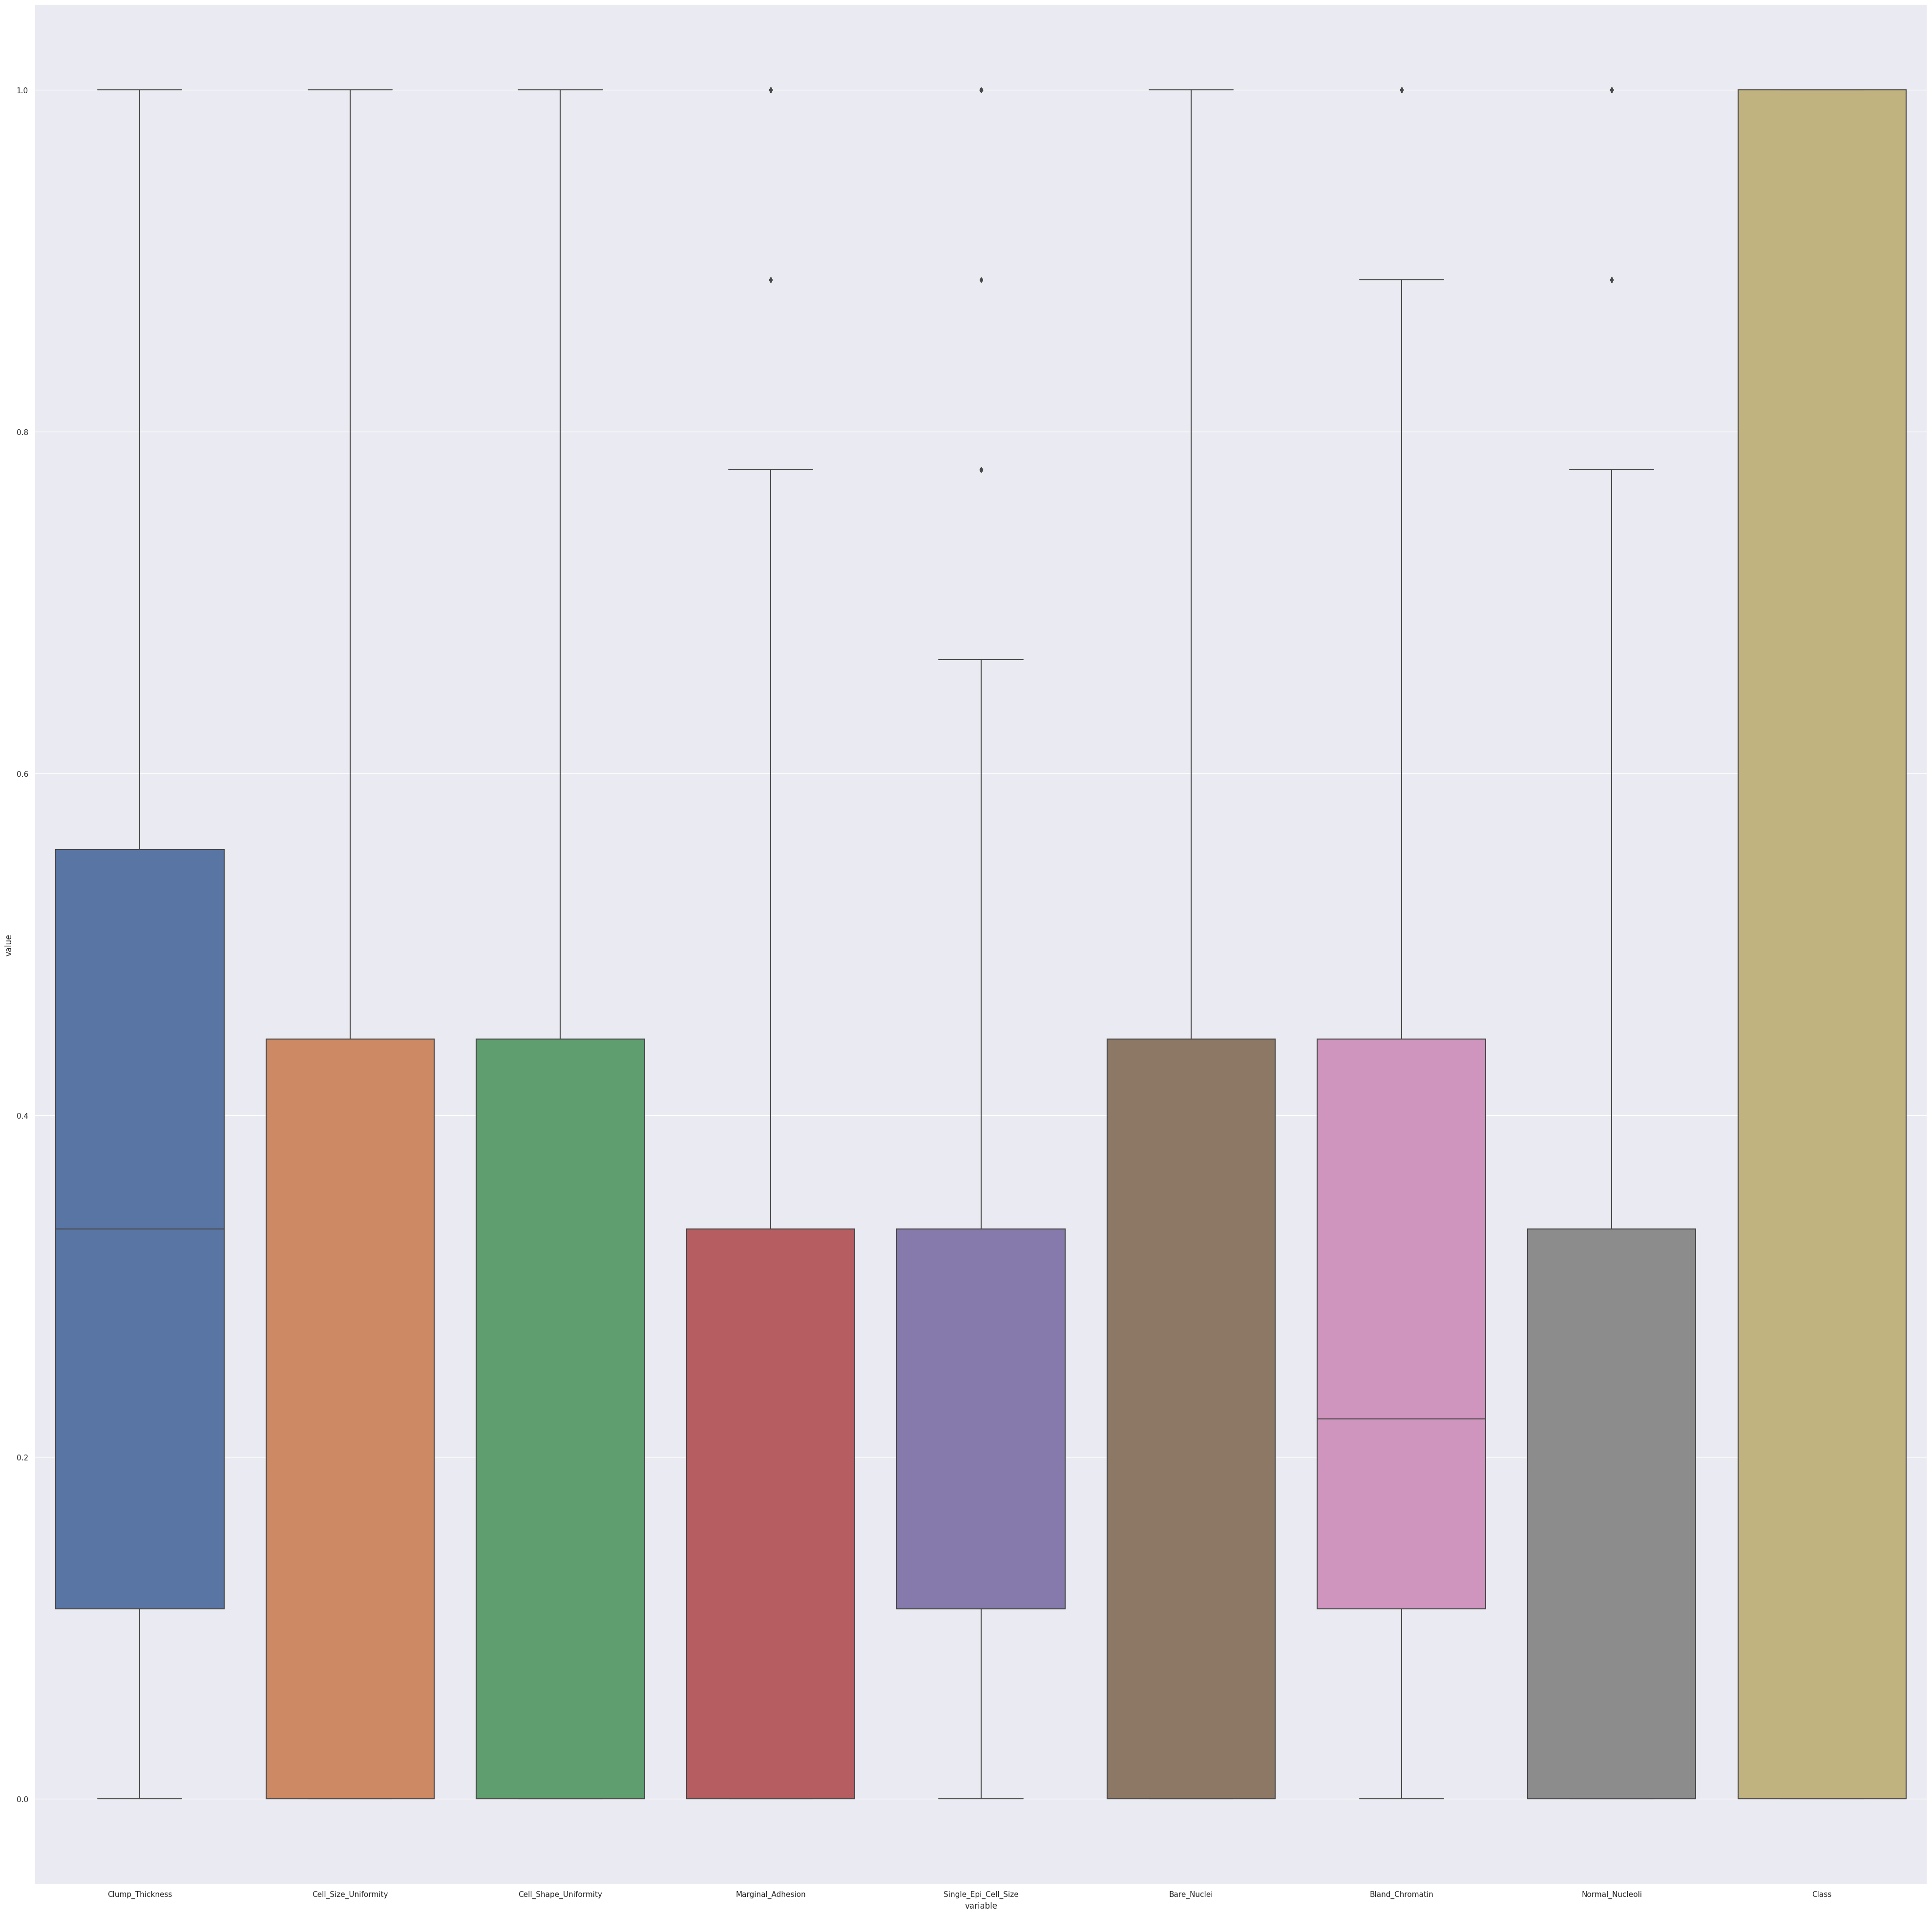

In [ ]:
boxplot(new_scalled_data)

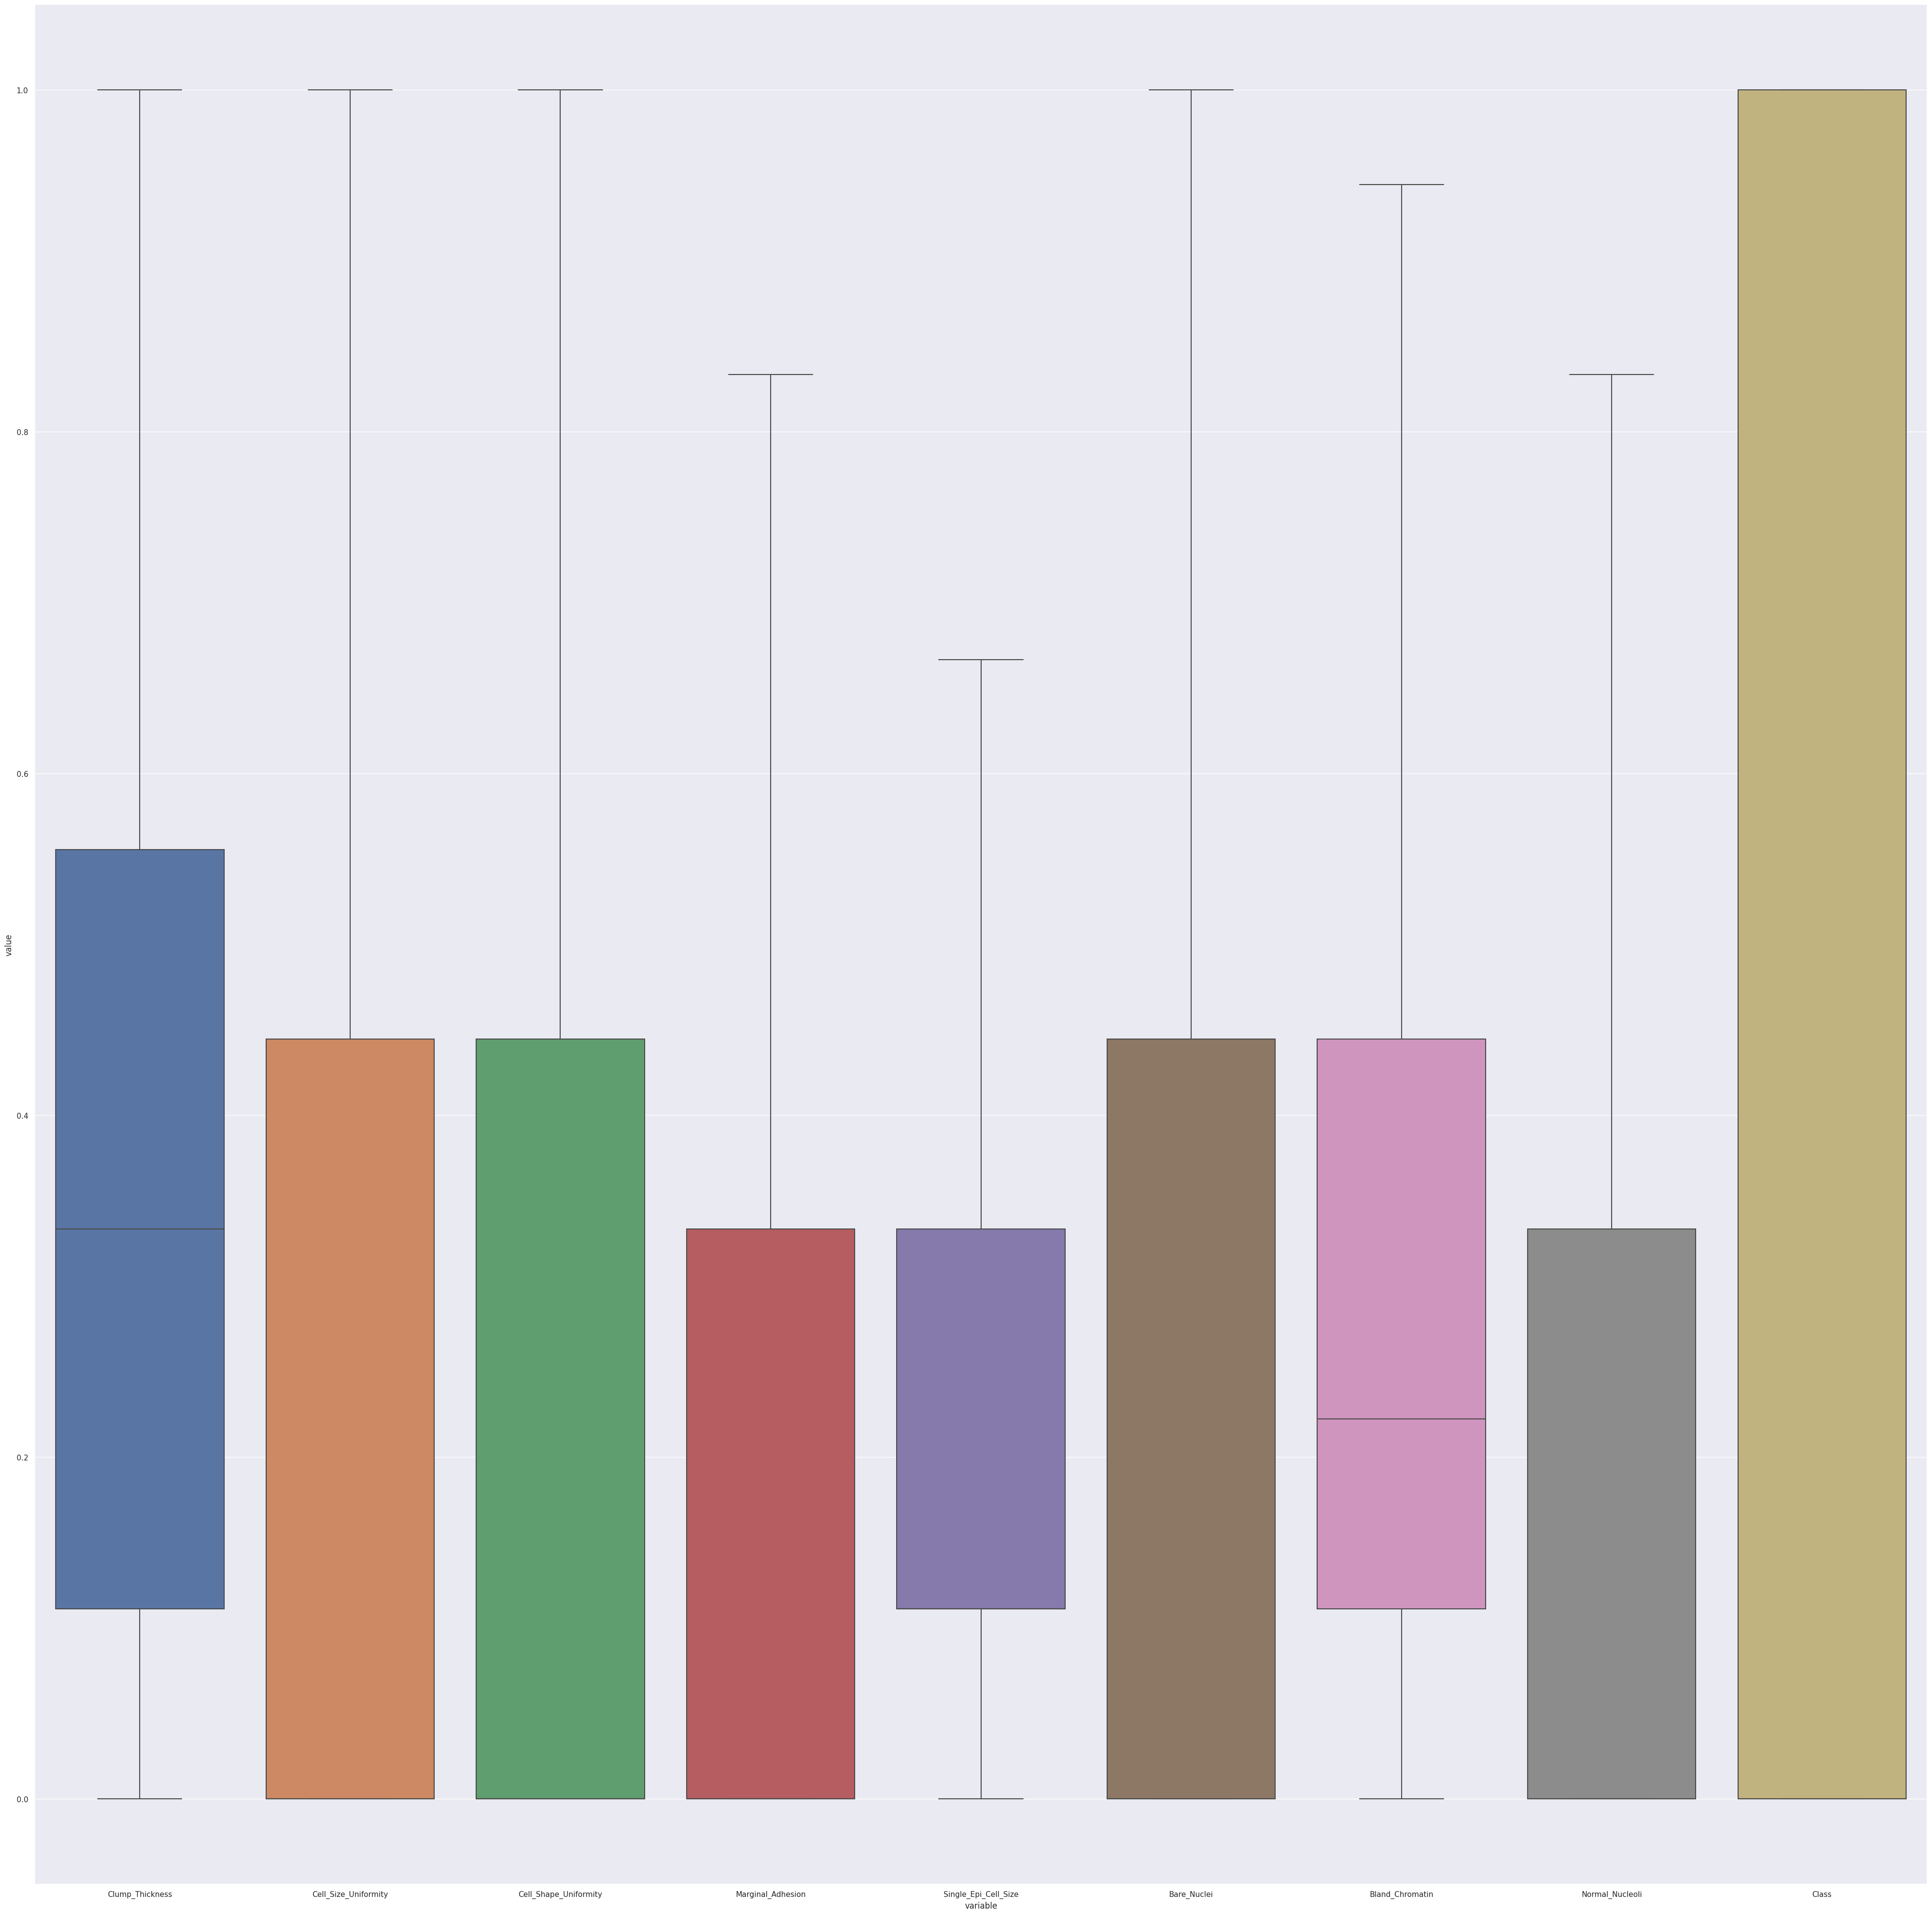

In [ ]:
InterQuartile(new_scalled_data)
boxplot(new_scalled_data)

In [ ]:
new_scalled_data

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
694,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.0
695,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.0
696,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,0.833333,1.0
697,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,0.944444,0.555556,1.0


### **Modelling**

#### TPOT Classifier

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn import datasets

from tpot import TPOTClassifier
# from autoPyTorch import AutoPyTorchClassifier

In [ ]:
#Proses split data (Data Training = 80% ; Data Testing = 20%)

x = new_scalled_data.iloc[:, :-1]
y = new_scalled_data['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# Pembangunan Model TPOT

tpot_params = {
    'generations': 5,
    'population_size': 20,
    'scoring': 'accuracy',
    'cv': 5,
    'random_state': 42,
    'verbosity': 2,
    'n_jobs': -1
}

tpot = TPOTClassifier(**tpot_params)
tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9677927927927928

Generation 2 - Current best internal CV score: 0.9677927927927928

Generation 3 - Current best internal CV score: 0.9677927927927928

Generation 4 - Current best internal CV score: 0.9677927927927928

Generation 5 - Current best internal CV score: 0.9677927927927928

Best pipeline: LinearSVC(input_matrix, C=0.0001, dual=True, loss=squared_hinge, penalty=l2, tol=0.001)


TPOTClassifier(generations=5, n_jobs=-1, population_size=20, random_state=42,
               scoring='accuracy', verbosity=2)

In [ ]:
# Evaluasi Model TPOT

y_train_pred = tpot.predict(x_train)
y_test_pred = tpot.predict(x_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Metrics for Training Set:")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"Accuracy: {accuracy_train:.4f}")

print("\nMetrics for Test Set:")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"Accuracy: {accuracy_test:.4f}")

Metrics for Training Set:
MAE: 0.0322
MSE: 0.0322
Accuracy: 0.9678

Metrics for Test Set:
MAE: 0.0357
MSE: 0.0357
Accuracy: 0.9643
